In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas_datareader as data
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import datetime
from datetime import time
from pandas.tseries.frequencies import to_offset
import tensorflow as tf
from sklearn import metrics
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from ipyvizzu import Chart, Data, Config, Style

Implementation based on the Mark Minervini Trend Template. Author has dound that these conditions indicates that the stock is ready to potentially be bought and go on a massive run. It could be a good start point for trading.

In [2]:
yf.pdr_override()

start = dt.datetime(2020,12,1)
now = dt.datetime(2022,6,14)
# now = dt.datetime.now()

In [3]:
exportList= pd.DataFrame(columns=['Stock', "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"]) # "RS_Rating",

### Relative Strength (RS) Rating
The RS Rating, ranging from 1 (worst) to 99 (best), measures a stock's price performance over the last 12 months. The best stocks tend to have an 80 or better RS Rating as they launch a new climb.

In [4]:

all_stocks = pd.DataFrame([
	'AXP','AAPL','BA','CAT','CSCO','CVX','XOM','GS','HD','IBM','INTC','JNJ','KO', 
	'SIDU', 'BYND', 'GOLD', 'HOOD', 'EVOK', 'SPOT', 'OKE', 'WWE', 'SRNE', 'ROKU', 'ACAD', 'SNAP', 'DYN', 'OLN', 
	'CVNA', 'TWTR', 'MULN', 'AERC', 'CHWY', 'PINS', 'AMZN', 'AMC', 'AMAT', 'GOOG', 'NIO', 'LI', 'SQ', 'TSM', 'BAC',
	'T', 'ARCT', 'GME', 'TSLA', 'INTC', 'PBR', 'PLTR', 'RBLX', 'KGC', 'ABEV', 'NOK', 'AAL', 'BBD', 'SNAP', 'NVDA', 
	'NLY', 'SOFI', 'ITUB', 'CCL', 'F', 'AMD', 'DIDI'
])
all_stocks.columns = ['Symbol']


for i in all_stocks.index:
	stock=str(all_stocks["Symbol"][i])

	try:
		df = pdr.get_data_yahoo(stock, start, now)

		SMAused=[50,150,200]
		for x in SMAused:
			sma=x
			df["SMA_"+str(sma)]=round(df.iloc[:,4].rolling(window=sma).mean(),2)


		currentClose=df["Adj Close"][-1]
		moving_average_50=df["SMA_50"][-1]
		moving_average_150=df["SMA_150"][-1]
		moving_average_200=df["SMA_200"][-1]
		low_of_52week=min(df["Adj Close"][-260:])
		high_of_52week=max(df["Adj Close"][-260:])
		try:
			moving_average_200_20 = df["SMA_200"][-20]

		except Exception:
			moving_average_200_20=0

		#Condition 1: Current Price > 150 SMA and > 200 SMA
		if(currentClose>moving_average_150>moving_average_200):
			cond_1=True
		else:
			cond_1=False
		#Condition 2: 150 SMA and > 200 SMA
		if(moving_average_150>moving_average_200):
			cond_2=True
		else:
			cond_2=False
		#Condition 3: 200 SMA trending up for at least 1 month (ideally 4-5 months)
		if(moving_average_200>moving_average_200_20):
			cond_3=True
		else:
			cond_3=False
		#Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
		if(moving_average_50>moving_average_150>moving_average_200):
			#print("Condition 4 met")
			cond_4=True
		else:
			#print("Condition 4 not met")
			cond_4=False
		#Condition 5: Current Price > 50 SMA
		if(currentClose>moving_average_50):
			cond_5=True
		else:
			cond_5=False
		#Condition 6: Current Price is at least 30% above 52 week low (Many of the best are up 100-300% before coming out of consolidation)
		if(currentClose>=(1.3*low_of_52week)):
			cond_6=True
		else:
			cond_6=False
		#Condition 7: Current Price is within 25% of 52 week high
		if(currentClose>=(.75*high_of_52week)):
			cond_7=True
		else:
			cond_7=False
		
		if(cond_1 and cond_2 and cond_3 and cond_4 and cond_5 and cond_6 and cond_7):
			exportList = exportList.append({'Stock': stock,  "50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True) #"RS_Rating": RS_Rating,  and cond_8
	except Exception:
		print("No data on "+stock)
print()
print(exportList)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
exportList

,Stock,50 Day MA,150 Day Ma,200 Day MA,52 Week Low,52 week High
0,XOM,89.87,77.02,72.15,50.938484,104.589996


In [6]:
stock = exportList['Stock'][0]

In [7]:
exportList.to_excel(r"C:\Users\simon\Downloads\screened2.xlsx")

In [8]:
# Choosing a period which we want to analyze for training and validating
start = datetime.datetime(2000, 1, 1)
end = datetime.date.today()

# BA boeing company, data from Yahoo finanse
stock_d = data.DataReader(stock, 'yahoo', start, end)

# week opening
def week_open(array_like):
    return array_like[0]

# week closing
def week_close(array_like):
    return array_like[-1]

# Aplied logic: that opening day is Monday, Closing day is Friday
logic = {
                        # Open - first day (Monday) opening value
                        'Open': week_open, 
                        # High - max value of the period
                         'High': 'max',
                        # Low - min value of the period
                         'Low': 'min',
                        #  Close - last day closing value (Friday)
                         'Close': week_close,
                         #  Adj Close - last day closing value (Friday)
                         'Adj Close': week_close,
                        #  Volume - sum of period Volume values
                         'Volume': 'sum'}

# Converting daily data to weekly with aplied logic
stock_w = stock_d.resample('W').apply(logic) 
stock_w.index -= to_offset('6D')

df1 = stock_d[['Open', 'High', 'Low',  'Close', 'Adj Close', 'Volume']].reset_index()
dfw = stock_w[['Open', 'High', 'Low',  'Close', 'Adj Close', 'Volume']].reset_index()
df = stock_d[['Open', 'High', 'Low',  'Close', 'Adj Close']] 

In [9]:
print(df.tail(5))

                 Open       High        Low      Close  Adj Close
Date                                                             
2022-06-13  97.519997  97.769997  93.919998  95.849998  95.849998
2022-06-14  97.410004  98.669998  95.269997  96.099998  96.099998
2022-06-15  95.989998  96.570000  93.269997  94.889999  94.889999
2022-06-16  92.410004  93.129997  90.279999  91.389999  91.389999
2022-06-17  90.959999  91.349998  85.660004  86.120003  86.120003


## Stock history

In [10]:
chart = Chart(display="manual")

data = Data()

df1 = df1[df1["Date"] > "2018-01-01"]

data.add_data_frame(df1)

chart.animate(data)
chart.scroll_into_view = True

# chart.animate(Config({
#     "geometry": "line"
# }))

chart.animate(Config({
    "geometry": "rectangle"
}))
chart.animate(Config({"title": "Volume 2016-2022"}))
chart.animate(Config({"x": "Date", "y": "Volume"}))
chart.animate(Config({"title": "Close Price 2016-2022"}))
chart.animate(Config({"x": "Date", "y": "Close"}))

# chart.animate(Config({"title": "Moving averages"}))
# chart.animate(Config({"title": "Moving averages 50"}))
# chart.animate(Config({"x": "Date", "y": "SMA50"}))
# chart.animate(Config({"title": "Moving averages 150"}))
# chart.animate(Config({"x": "Date", "y": ("SMA150")}))
# chart.animate(Config({"title": "Moving averages 200"}))
# chart.animate(Config({"x": "Date", "y": ("SMA200")}))

chart.animate(Config({
    "geometry": "line"
}))

chart.feature("tooltip", True)

chart.animate(Style({"title": {"fontSize": 25}}))
chart

In [11]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df1['Date'], y=df1['Close'], name="Close"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(x=df1['Date'], y=df1['Volume'], name="Volume"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text=f"{stock} Close prices and Volume"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Close Price", secondary_y=True)

fig.show()

# TODO: add a barchart with close price

In [13]:
df1['SMA50'] = df1.Close.rolling(50).mean()
df1['SMA150'] = df1.Close.rolling(150).mean()
df1['SMA200'] = df1.Close.rolling(200).mean()

fig = go.Figure(data=[
            go.Scatter(x=df1.Date, y=df1.SMA50, line=dict(color='orange', width=1), name="SMA50"),
            go.Scatter(x=df1.Date, y=df1.SMA150, line=dict(color='green', width=1), name="SMA150"),
            go.Scatter(x=df1.Date, y=df1.SMA200, line=dict(color='blue', width=1), name="SMA200")])

# Add figure title
fig.update_layout(
    title_text=f"{stock} 50 day, 150 day and 200day moving averages"
)
fig.show()

#### Financial chart below describes open, high, low and close prices for a given date. The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values.

In [14]:
#TODO: Is it possible to make a button or dropdown list on Hugging face to sellect which chart to show (daily, weekly or monthly)?

In [15]:
# date_range = df1[df1["Date"] > "2018-01-01"]

fig = go.Figure(data=[go.Candlestick(x=df1['Date'], 
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
                ])
fig.update_layout(
    title=f'{stock} Stock Price Daily Data',
    shapes = [dict(
        x0='2021-01-27', x1='2021-01-27', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-01-27', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(count = 2, label = '2y', step = 'year', stepmode = 'backward'),
            dict(count = 5, label = '5y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))
fig.show()

In [16]:
fig = go.Figure(data=[go.Candlestick(x=dfw['Date'], 
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
                ])
fig.update_layout(
    title=f'{stock} Stock Price Weekly Data',
    shapes = [dict(
        x0='2018-09-10', x1='2018-09-10', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2018-09-10', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(count = 2, label = '2y', step = 'year', stepmode = 'backward'),
            dict(count = 5, label = '5y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))
# fig.add_hline(y=40)
fig.show()

In [17]:
dates = [
         datetime.datetime(year=2021, month=7, day=17),
         datetime.datetime(year=2021, month=8, day=17),
         datetime.datetime(year=2021, month=9, day=17),
         datetime.datetime(year=2021, month=10, day=17),
         datetime.datetime(year=2021, month=11, day=17),
         datetime.datetime(year=2021, month=12, day=17),
         datetime.datetime(year=2022, month=1, day=17),
         datetime.datetime(year=2022, month=2, day=17),
         datetime.datetime(year=2022, month=3, day=17),
         datetime.datetime(year=2022, month=4, day=17),
         datetime.datetime(year=2022, month=5, day=17),
         datetime.datetime(year=2022, month=6, day=17)
         ]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=df1.Open, high=df1.High,
                       low=df1.Low, close=df1.Close)])
fig.update_layout(
    title=f'{stock} Stock Price Monthly Data',
)

fig.show()

## Finacial analysis

In [18]:
# Get information
sec = yf.Ticker("XOM")

## Earnings

In [19]:
earnings = pd.DataFrame(sec.earnings)

trace1 = go.Bar(
    x = earnings.index,
    y = earnings['Revenue'],
    name='Revenue',
    marker=dict(color='rgba(16, 112, 2, 0.8)',
                line=dict(color='rgb(0,0,0)', width=1)),     )

trace2 = go.Bar(
    x = earnings.index,
    y = earnings['Earnings'],
    name='Earnings',
    marker=dict(color='rgba(80, 26, 80, 0.8)',
                line=dict(color='rgb(0,0,0)', width=1)),     )

data = [trace1, trace2]
layout = dict(
    title='Earnings 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5,
        zeroline=True, linewidth=1, linecolor='black'
        ) )

    
fig = go.Figure(data=data, layout=layout)            
py.iplot(fig)

## Financials

In [20]:
financials = pd.DataFrame(sec.financials)

con_fin =financials.transpose()
convert_fin = con_fin.sort_index(ascending=True)
display(convert_fin)

trace1 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_fin['Net Income'],
    mode='lines+markers',
    name='Net Income',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_fin['Ebit'],
    mode='lines+markers',
    name='Ebit',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_fin['Gross Profit'],
    mode='lines+markers',
    name='Gross Profit',
    marker=dict(color='rgba(247, 43, 163, 0.8)'),
)
data = [trace1, trace2, trace3]
layout = dict(
    title='Financials 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data, layout=layout)            
py.iplot(fig)

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
,,,,,,,,,,,,,,,,,,,,,
2018-12-31,None,None,30953000000.0,6734000000.0,20840000000.0,12300000000.0,90308000000.0,23267000000.0,23267000000.0,35230000000.0,...,None,None,9532000000.0,281060000000.0,257793000000.0,190752000000.0,7686000000.0,None,21421000000.0,20840000000.0
2019-12-31,None,None,20056000000.0,7288000000.0,14340000000.0,12168000000.0,81066000000.0,15545000000.0,15545000000.0,33186000000.0,...,None,None,5282000000.0,259497000000.0,243952000000.0,178431000000.0,4511000000.0,None,14774000000.0,14340000000.0
2020-12-31,None,None,-28883000000.0,6980000000.0,-22440000000.0,10881000000.0,57157000000.0,-4432000000.0,-4432000000.0,28425000000.0,...,None,None,-5632000000.0,179784000000.0,184216000000.0,122627000000.0,-24451000000.0,None,-23251000000.0,-22440000000.0
2021-12-31,None,None,31234000000.0,7106000000.0,23040000000.0,9849000000.0,90045000000.0,26780000000.0,26780000000.0,32955000000.0,...,None,None,7636000000.0,278981000000.0,252201000000.0,188936000000.0,4454000000.0,None,23598000000.0,23040000000.0


## Balance

In [21]:
# extracting balance info from Yahoo Finanse
balance = pd.DataFrame(sec.balancesheet)

# transposing and sorting data
con_balance = balance.transpose()
convert_balance = con_balance.sort_index(ascending=True)

# Total Current Liabilities, Cash, Total Assets
trace1 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Total Current Liabilities'],
    mode='lines+markers',
    name='Total Current Liabilities',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Cash'],
    mode='lines+markers',
    name='Cash',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Total Assets'],
    mode='lines+markers',
    name='Total Assets',
    marker=dict(color='rgba(225, 103, 17, 0.53)'),
)
data = [trace1, trace2, trace3]
layout = dict(
    title='Balance 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data, layout=layout)            
py.iplot(fig)

In [22]:
convert_balance

,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Treasury Stock,...,Short Long Term Debt,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable
,,,,,,,,,,,,,,,,,,,,,
2018-12-31,1.476680e+11,1.917940e+11,6.734000e+09,1.553700e+10,3.461960e+11,1.525800e+10,1.272000e+09,4.216530e+11,6.999200e+10,-2.451170e+11,...,4.070000e+09,-1.956400e+10,2.471010e+11,4.797300e+10,2.659200e+10,1.917940e+11,2.470100e+10,1.923500e+10,1.895800e+10,2.106300e+10
2019-12-31,1.636590e+11,1.916500e+11,7.288000e+09,1.419000e+10,3.625970e+11,1.563700e+10,1.469000e+09,4.213410e+11,6.870700e+10,-2.453280e+11,...,1.617000e+09,-1.949300e+10,2.596510e+11,5.005200e+10,2.948100e+10,1.916500e+11,2.696600e+10,2.467200e+10,1.852800e+10,2.469400e+10
2020-12-31,1.686200e+11,1.571500e+11,6.980000e+09,1.382600e+10,3.327500e+11,1.568800e+10,1.098000e+09,3.839430e+11,6.094600e+10,-2.424810e+11,...,2.828000e+09,-1.670500e+10,2.336310e+11,4.489300e+10,2.991500e+10,1.571500e+11,2.058100e+10,4.550200e+10,1.885000e+10,1.749900e+10
2021-12-31,1.632400e+11,1.685770e+11,7.106000e+09,2.047700e+10,3.389230e+11,1.574600e+10,1.189000e+09,3.920590e+11,5.921500e+10,-2.392280e+11,...,2.281000e+09,-1.376400e+10,2.226340e+11,5.915400e+10,3.136300e+10,1.685770e+11,3.238300e+10,4.166700e+10,1.878000e+10,2.662300e+10


In [23]:
trace1 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Long Term Debt'],
    mode='lines+markers',
    name='Long Term Debt',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Inventory'],
    mode='lines+markers',
    name='Inventory',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
)
trace3 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Accounts Payable'],
    mode='lines+markers',
    name='Accounts Payable',
    marker=dict(color='rgba(225, 103, 17, 0.53)'),
)
trace4 = go.Scatter(
    x=['2018', '2019', '2020', '2021'],
    y=convert_balance['Net Receivables'],
    mode='lines+markers',
    name='Net Receivables',
    marker=dict(color='rgba(247, 43, 163, 0.8)'),
)
data = [trace1, trace2, trace3, trace4]
layout = dict(
    title='Balance 2018-2021',
    xaxis=dict( 
        ticks='outside', ticklen=5, 
        zeroline=True, linewidth=1, linecolor='black'
        ))
fig = dict(data=data, layout=layout)            
py.iplot(fig)

## Cashflow
Repurchase Of Stock , Net Income, Dividends Paid

In [24]:
cashflow = pd.DataFrame(sec.cashflow)

cf = cashflow.transpose()
cf = cf.sort_index(ascending=True)
cf = cf.reset_index()

cf.columns = ['Date',
 'Investments',
 'Change To Liabilities',
 'Total Cashflows From Investing Activities',
 'Net Borrowings',
 'Total Cash From Financing Activities',
 'Change To Operating Activities',
 'Net Income',
 'Change In Cash',
 'Repurchase Of Stock',
 'Effect Of Exchange Rate',
 'Total Cash From Operating Activities',
 'Depreciation',
 'Other Cashflows From Investing Activities',
 'Dividends Paid',
 'Change To Inventory',
 'Change To Account Receivables',
 'Other Cashflows From Financing Activities',
 'Change To Netincome',
 'Capital Expenditures']

In [25]:
# Animated chart

data = Data()
data.add_data_frame(cf)
chart = Chart(display="manual")
chart.scroll_into_view = True
chart.animate(data)

chart.animate(Config({"title": "Repurchase Of Stock"}))
chart.animate(Config({"x": "Date", "y": ["Repurchase Of Stock"]}))
chart.animate(Config({"title": "Net Income 2018-2021"}))
chart.animate(Config({"x": "Date", "y": ["Net Income"], "color": "Net Income"}))
# chart.animate(Config({"x": "Date", "y": ["Dividends Paid"]}))
# chart.animate(Config({"x": "Date", "y": ["Net Income"], "color": "Net Income"}))

# chart.animate(Config({"geometry": "area"}))

chart.feature("tooltip", True)

chart

In [26]:
# Animated chart

data = Data()
data.add_data_frame(cf)
chart = Chart(display="manual")
chart.animate(data)

chart.animate(Config({"title": "Dividends Paid"}))
chart.animate(Config({"x": "Date", "y": ["Dividends Paid"]}))
chart.animate(Config({"title": "Net Income"}))
chart.animate(Config({"x": "Date", "y": ["Net Income"], "color": "Net Income"}))

chart.animate(Config({"geometry": "area"}))

chart.feature("tooltip", True)

chart

## Dividends

We decided not to show quarterly dividends and to show average dividends rate per year instead. The purpose of this decission is to have a clear view of a trend.

In [27]:
dividends = pd.DataFrame(sec.dividends)
dividends = dividends.reset_index()
# dividends = dividends[dividends["Date"] > "2000-01-01"]
dividends['Year'] = dividends['Date'].dt.year
div = dividends.groupby(by=["Year"]).mean()
div = div.reset_index()
# display(div)

fig = px.bar(div, x='Year', y='Dividends',
            color='Year',
         
             height=400)
fig.show()

## Institutional holders

In [28]:
institutional_holders = pd.DataFrame(sec.institutional_holders)

trace1 = go.Pie(
    values=institutional_holders['Value'],
    labels=institutional_holders['Holder'], 
    hole=0.5 )

data = [trace1]
layout = dict(
    title='Institutional holders',
    uniformtext_minsize=12,
    uniformtext_mode='hide'
    )
fig = go.Figure(data=data)
fig.update_traces(textposition='inside')
fig.update_layout(layout)
  
fig.show()

## Building Bidirectional LSTM model

In [29]:
x = 1
validate = df[['Open', 'High', 'Low',  'Close', 'Adj Close']].tail(x)
df.drop(df.tail(x).index,inplace=True)

c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
df = df.reset_index()
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.shape)
print(train_dates.tail(15)) #Check last few dates. 

(5651,)
5636   2022-05-26
5637   2022-05-27
5638   2022-05-31
5639   2022-06-01
5640   2022-06-02
5641   2022-06-03
5642   2022-06-06
5643   2022-06-07
5644   2022-06-08
5645   2022-06-09
5646   2022-06-10
5647   2022-06-13
5648   2022-06-14
5649   2022-06-15
5650   2022-06-16
Name: Date, dtype: datetime64[ns]


In [31]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()
X_data = X_scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close', 'Close']])
Y_data = Y_scaler.fit_transform(df[['Close']]) 

In [32]:
def custom_ts_multi_data_prep(df, target, start, end, n_past, n_future):
    X = []
    y = []
    start = start + n_past
    if end is None:
        end = len(df) - n_future
    for i in range(start, end):
        indices = range(i-n_past, i)
        X.append(df[indices])
        indicey = range(i+1, i+1+n_future)
        y.append(target[indicey])
    return np.array(X), np.array(y) 

In [33]:
n_past = 52
n_future = 1
TRAIN_SPLIT = len(df)-300
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, n_past, n_future)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, n_past, n_future) 

In [34]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target\n')
print (y_train[0]) 

Multiple window of past history

[[-1.45454722 -1.44825121 -1.47044177 -1.5714472  -1.48481104]
 [-1.50932813 -1.51401955 -1.50603756 -1.59325255 -1.52344233]
 [-1.4932161  -1.42258551 -1.47205976 -1.53237771 -1.41559666]
 [-1.42554555 -1.31831862 -1.41057613 -1.47150377 -1.30775098]
 [-1.28859327 -1.30708988 -1.31187873 -1.47513758 -1.31418953]
 [-1.33370696 -1.34879664 -1.32320466 -1.49240038 -1.34477263]
 [-1.34498539 -1.33275558 -1.32158667 -1.48876623 -1.33833409]
 [-1.35787501 -1.35521306 -1.34262054 -1.49603465 -1.35121118]
 [-1.3514302  -1.31350631 -1.33453059 -1.46786906 -1.30131244]
 [-1.29987169 -1.32633915 -1.33776657 -1.49240038 -1.34477263]
 [-1.37076464 -1.32633915 -1.35394647 -1.47786345 -1.31901844]
 [-1.33209576 -1.31671452 -1.31996868 -1.46605249 -1.29809316]
 [-1.30792771 -1.33275558 -1.34585652 -1.49330878 -1.34638227]
 [-1.33854057 -1.33435968 -1.32967662 -1.4742293  -1.31257989]
 [-1.30148289 -1.30548578 -1.33776657 -1.48513153 -1.33189554]
 [-1.33854057 -1.31029

In [35]:
batch_size = 64
buffer_size = 150
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=n_future),
 ])
model.compile(optimizer='adam', loss='mse') # metrics='mae
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 52, 128)          35840     
 l)                                                              
                                                                 
 dense (Dense)               (None, 52, 20)            2580      
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               13568     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [37]:

model_path = 'LSTM_multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5) #,  mode='min'
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True,  verbose=0) #mode='min',
callbacks=[early_stopings,checkpoint] 
history = model.fit(train_data,epochs=15,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/15
100/100 [==============================] - 16s 105ms/step - loss: 0.2798 - val_loss: 0.2108
Epoch 2/15
100/100 [==============================] - 9s 95ms/step - loss: 0.0888 - val_loss: 0.1655
Epoch 3/15
100/100 [==============================] - 9s 94ms/step - loss: 0.0765 - val_loss: 0.1071
Epoch 4/15
100/100 [==============================] - 9s 95ms/step - loss: 0.0511 - val_loss: 0.0620
Epoch 5/15
100/100 [==============================] - 10s 95ms/step - loss: 0.0523 - val_loss: 0.1350
Epoch 6/15
100/100 [==============================] - 9s 91ms/step - loss: 0.0556 - val_loss: 0.1333
Epoch 7/15
100/100 [==============================] - 9s 90ms/step - loss: 0.0469 - val_loss: 0.0982
Epoch 8/15
100/100 [==============================] - 9s 92ms/step - loss: 0.0454 - val_loss: 0.0315
Epoch 9/15
100/100 [==============================] - 9s 93ms/step - loss: 0.0533 - val_loss: 0.0739
Epoch 10/15
100/100 [==============================] - 9s 91ms/step - loss: 0.0710 - val

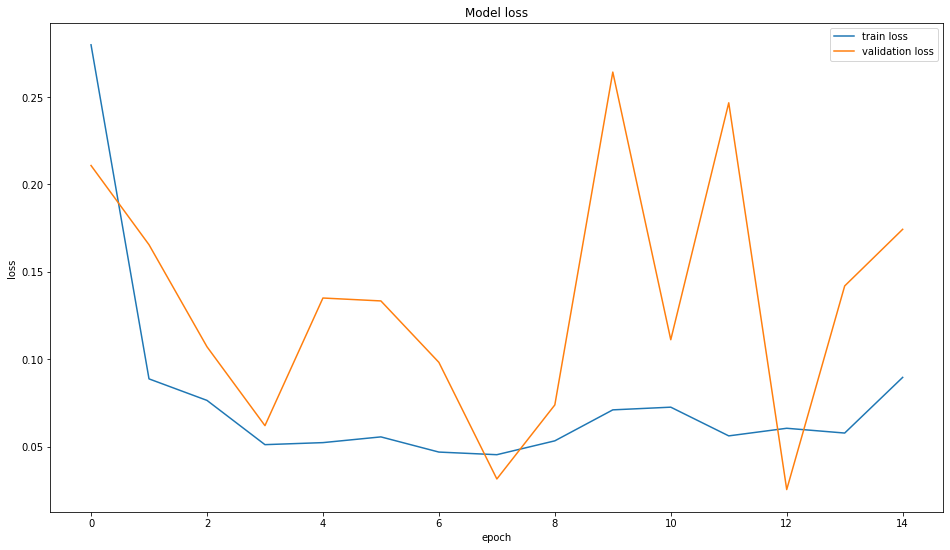

In [38]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

### Forecasting is completely unavailable and must be only estimated with the help of what has already happened.

In [39]:
data_val = X_scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close', 'Close']].tail(52))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred = model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 1s 1s/step


array([[86.88531]], dtype=float32)

In [40]:
validate['Close']

Date
2022-06-17    86.120003
Name: Close, dtype: float64

In [41]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 


timeseries_evaluation_metrics_func(validate['Close'], pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.5856910778675228
MAE is : 0.7653045654296875
RMSE is : 0.7653045654296875
MAPE is : 0.8886490258037774
R2 is : nan



c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



## Building LSTM model to predict 1 day in future

In [57]:
# # Choosing a period which we want to analyze for training and validating.
# start = datetime.datetime(2000, 1, 1)
# end = datetime.date.today()

# # Data from Yahoo finanse
# df = data.DataReader('XOM', 'yahoo', start, end)


In [43]:
df.head()

,Date,Open,High,Low,Close,Adj Close
0,2000-01-03,39.75000,40.37500,38.93750,39.15625,19.472008
1,2000-01-04,38.68750,39.09375,38.25000,38.40625,19.099049
2,2000-01-05,39.00000,40.87500,38.90625,40.50000,20.140253
3,2000-01-06,40.31250,42.90625,40.09375,42.59375,21.181442
4,2000-01-07,42.96875,43.12500,42.00000,42.46875,21.119289


In [56]:
# #Separate dates for future plotting
# df =  df[['Open', 'High', 'Low', 'Close', 'Adj Close']].reset_index()
# train_dates = pd.to_datetime(df['Date'])
# print(train_dates.tail(5)) #Check last few dates. 

In [44]:
#Variables for training
cols = list(df)[1:6]

#Date and volume columns are not used in training. 
print(cols)

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [45]:
# New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

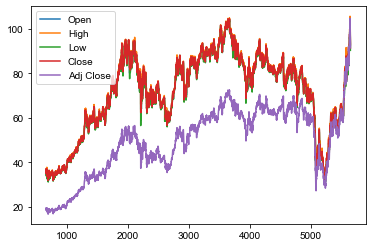

In [46]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()
sns.set(rc={'figure.figsize':(18,10)})

In [47]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized.
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [48]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 30 (past days data used for training)

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features).

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])


In [49]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (5621, 30, 5).
trainY shape == (5621, 1).


In [50]:
# We can only predict a single day after our training, the day after where our data ends
# To predict more days in future, we need all the 5 variables which we do not have. 
# We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 128)           68608     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [51]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
317/317 [==============================] - 12s 32ms/step - loss: 0.0453 - val_loss: 0.0349
Epoch 2/10
317/317 [==============================] - 9s 28ms/step - loss: 0.0214 - val_loss: 0.0328
Epoch 3/10
317/317 [==============================] - 10s 32ms/step - loss: 0.0172 - val_loss: 0.0190
Epoch 4/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0172 - val_loss: 0.0114
Epoch 5/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0154 - val_loss: 0.0108
Epoch 6/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0157 - val_loss: 0.0154
Epoch 7/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0144 - val_loss: 0.0125
Epoch 8/10
317/317 [==============================] - 10s 32ms/step - loss: 0.0141 - val_loss: 0.0075
Epoch 9/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0138 - val_loss: 0.0095
Epoch 10/10
317/317 [==============================] - 10s 31ms/step - loss: 0.0142

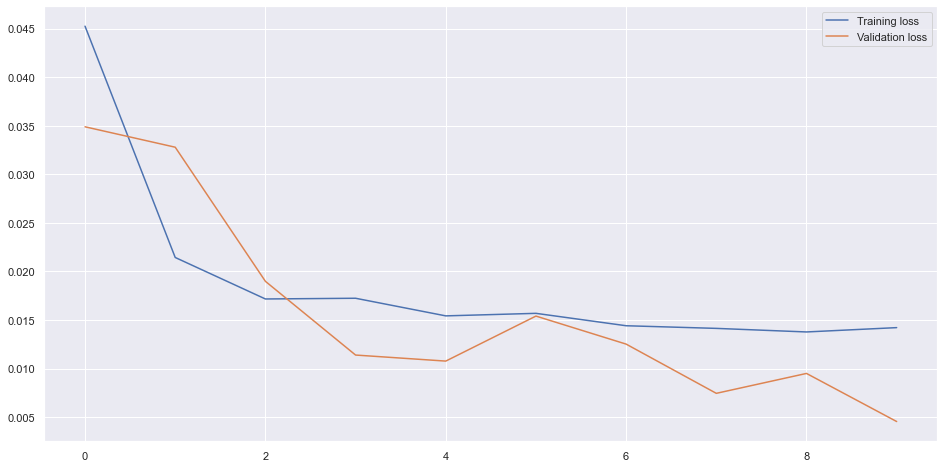

In [52]:
# Plot model history
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Predicting...

In [53]:

#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())


# We can only predict one day in future as our model needs 5 variables
# as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction


[Timestamp('2022-05-25 00:00:00', freq='C'), Timestamp('2022-05-26 00:00:00', freq='C'), Timestamp('2022-05-27 00:00:00', freq='C'), Timestamp('2022-05-31 00:00:00', freq='C'), Timestamp('2022-06-01 00:00:00', freq='C'), Timestamp('2022-06-02 00:00:00', freq='C'), Timestamp('2022-06-03 00:00:00', freq='C'), Timestamp('2022-06-06 00:00:00', freq='C'), Timestamp('2022-06-07 00:00:00', freq='C'), Timestamp('2022-06-08 00:00:00', freq='C'), Timestamp('2022-06-09 00:00:00', freq='C'), Timestamp('2022-06-10 00:00:00', freq='C'), Timestamp('2022-06-13 00:00:00', freq='C'), Timestamp('2022-06-14 00:00:00', freq='C'), Timestamp('2022-06-15 00:00:00', freq='C')]
1/1 [==============================] - 0s 454ms/step


In [54]:
# Perform inverse transformation to rescale back to original range
# We used 5 variables for transform, the inverse expects same dimensions
# Copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [55]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-6-1']

C:\Users\simon\AppData\Local\Temp\ipykernel_16732\119036315.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

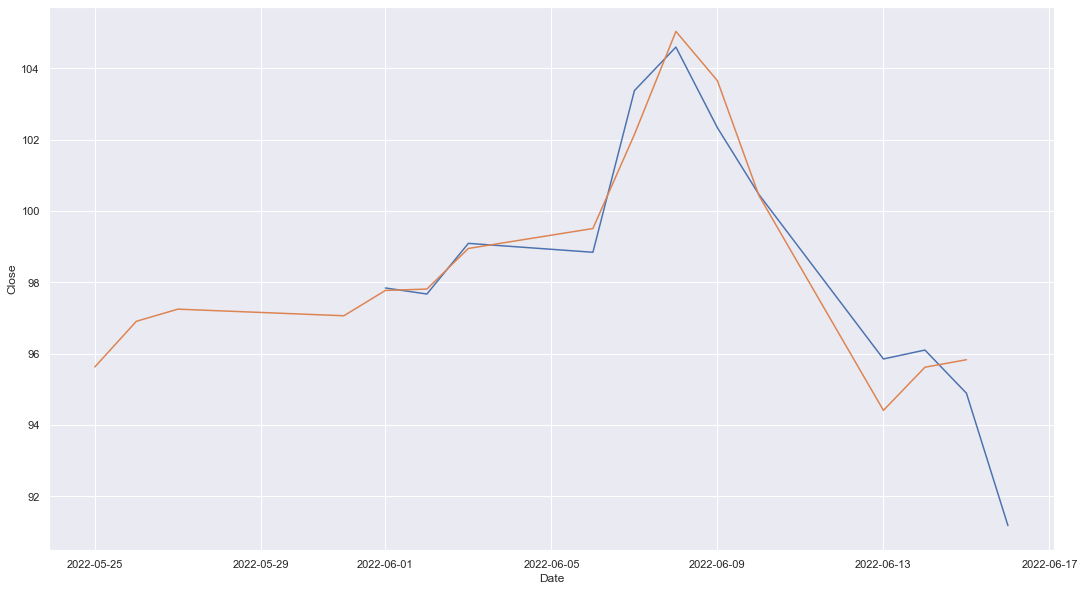

In [ ]:
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])